In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/USA/USA-1850-2008.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='USA']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='USA']
US_table = pd.merge(gdp_table, pop_table, on=['Year'])
US_table = pd.merge(US_table, energy_table, on=['Year'])
population = US_table['Total population (Gapminder, HYDE & UN)']
energy = US_table['Tot PEC (Quadrillion BTU)']
gdpc = US_table['GDP per capita']
gdp = gdpc*population
year = US_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

Text(0, 0.5, 'Quadrillion BTU')

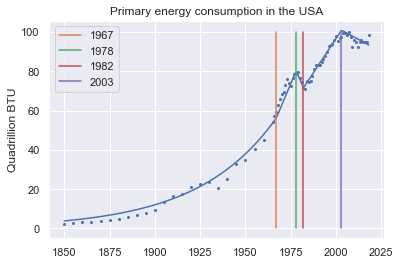

In [2]:
plt.scatter(year, energy, s=4)
r_0, y0_0 = reg.expReg(year, energy)
y0, r, a,c,e,g,x1,x2,x3,x4 = y0_0, 0.02298961724912632,2.2 , -2.2, 1.4, -0.5, 1967,1978, 1982, 2003
plt.plot(yplot, reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0, 100], label=str(x1))
plt.plot([x2, x2], [0, 100], label=str(x2))
plt.plot([x3, x3], [0, 100], label=str(x3))
plt.plot([x4, x4], [0, 100], label=str(x4))
plt.legend()
plt.title("Primary energy consumption in the USA")
plt.ylabel("Quadrillion BTU")

Text(0, 0.5, 'Quadrillion BTU')

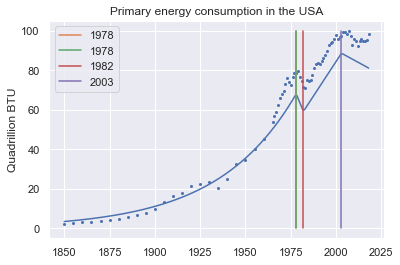

In [3]:
plt.scatter(year, energy, s=4)
r_0, y0_0 = reg.expReg(year, energy)
y0, r, a,c,e,g,x1,x2,x3,x4 = 0.800551090995104953*10**-18, 0.02319961724912632,2.2 , -2.2, 1.4, -0.5, 1978,1978, 1982, 2003
plt.plot(yplot, reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0, 100], label=str(x1))
plt.plot([x2, x2], [0, 100], label=str(x2))
plt.plot([x3, x3], [0, 100], label=str(x3))
plt.plot([x4, x4], [0, 100], label=str(x4))
plt.legend()
plt.title("Primary energy consumption in the USA")
plt.ylabel("Quadrillion BTU")

Text(0, 0.5, '10e13 $')

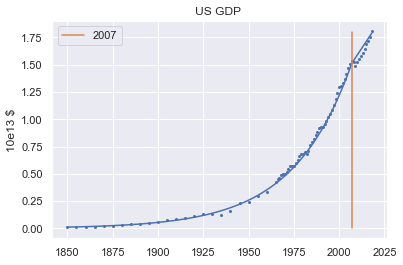

In [4]:
r, y0 = reg.expReg(year, gdp/10**13)
y0, r, a,c,e,g,x1,x2,x3,x4 = y0, r, 0.025, 0.01,1,1, 2007, 2025,2200,2300
plt.scatter(year, gdp/10**13, s=4)
#plt.plot(yplot, reg.exp_fun(yplot, y0=y0, r=r))
plt.plot(yplot, reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0,1.8], label=str(x1))
plt.legend()
plt.title("US GDP ")
plt.ylabel("10e13 $")

(0.5707085100288, 0.0074295839029999994, 9.999725341796875, 0.0008737725419578179, 0.001394637013871107, 4.95222227895061e-05)


Text(0.5, 0, 'GDP (10e13$)')

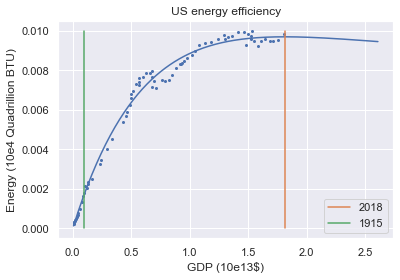

In [5]:
g = gdp/10**13
e = energy/ 10**4
gplot = np.linspace(g.min(), g.max()+0.8, 200)
plt.scatter(g,e, s= 4)
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e)
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.01], label = str(year_max)) 
inf_dist = np.array([abs(g[i]-0.1) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([0.1, 0.1],[0.0, 0.01], label = str(year_infl))
plt.legend()
plt.title('US energy efficiency')
plt.ylabel("Energy (10e4 Quadrillion BTU)")
plt.xlabel("GDP (10e13$)")

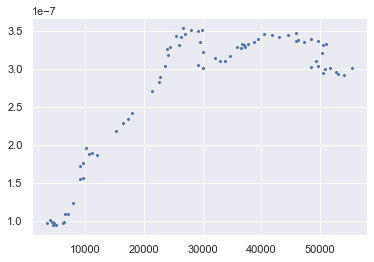

In [6]:
plt.scatter(gdp/population, energy/population, s=4)

(0.1114977, 1.8900249042152062e-07, 9.999725341796875, 3.775511875811102e-08, 1.2069487612738995e-07, 1.4361655896880094e-07)


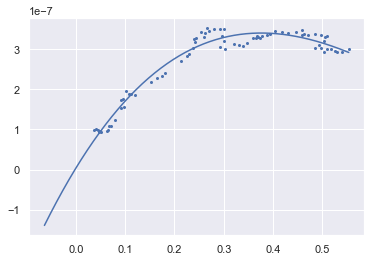

In [7]:
G = gdp/population/10**5
E = energy/population
plt.scatter(G, E, s=4)
G_i, E_i, A, a1, a2, a3 = reg.sReg(G, E)
Gplot = np.linspace(G.min()-0.1, G.max(), 200)
plt.plot(Gplot, reg.s_model(Gplot,G_i, E_i, A, a1, a2, a3))

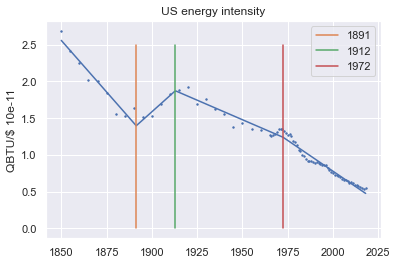

In [8]:
plt.scatter(year, energy/gdp*10**11, s=2)
a,b, c, e, g, x1, x2, x3 = -0.2, 2, 0.2, -0.2, -1, 1880, 1915, 1960
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**11, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-2, 2200] )
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3))
plt.plot([x1, x1], [0, 2.5], label = str(int(x1)))
plt.plot([x2, x2], [0, 2.5], label = str(int(x2)))
plt.plot([x3, x3], [0, 2.5], label = str(int(x3)))
plt.ylabel("QBTU/$ 10e-11")
plt.title("US energy intensity")
plt.legend()

Text(0.5, 1.0, 'Variation in (%), USA')

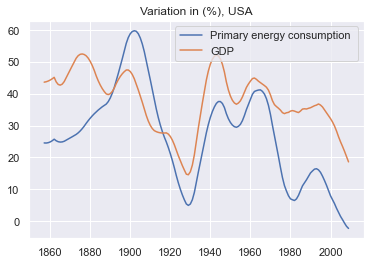

In [10]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), USA")
